In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from nested_lookup import nested_delete
from src import functions as fcn

In [2]:
lambdas = [
    -0.366875964264129 + 0.520259438865201*1j, #3/14
    0.595743941976559 + 0.254425889416369*1j, #3/8
    0.05277415108645189611947896053229129518349675421389 + 0.68814740940655613016868820363694147172435466851358j, #corner point
]

In [7]:
from sympy import *
x=Symbol('x')
poly = Function('poly')(x)
poly = simplify(1+x+x**2-2*x**3)
allroots = solveset(poly)

TypeError: 'FiniteSet' object is not subscriptable

In [3]:
neighborgraph = fcn.nbhG(lambdas[0],6)
neighborgraph

2022-10-17 09:58:35,406 - src.functions - DEBUG : depth=0 newVertices={'h1': -0.733751928528258 + 1.0405188777304*I}
2022-10-17 09:58:35,408 - src.functions - DEBUG : keyNb='h1' and valNb=-0.733751928528258 + 1.0405188777304*I
2022-10-17 09:58:35,413 - src.functions - DEBUG : hStar=-0.733751928528258 + 1.0405188777304*I
2022-10-17 09:58:35,416 - src.functions - DEBUG : hPM=0.e-125 + 0.e-125*I
2022-10-17 09:58:35,419 - src.functions - DEBUG : hMP=-1.46750385705652 + 2.0810377554608*I
2022-10-17 09:58:35,433 - src.functions - DEBUG : phiStar IS a child vertex
2022-10-17 09:58:35,435 - src.functions - DEBUG : keyNb='h1' is NOT in edges, adding a NEW edge h2 with label *
2022-10-17 09:58:35,444 - src.functions - DEBUG : phiPM IS a child vertex
2022-10-17 09:58:35,449 - src.functions - DEBUG : keyNb='h1' is in edges, adding edge h3 with label + -
2022-10-17 09:58:35,451 - src.functions - DEBUG : phiMP is POSSIBLY a new vertex
2022-10-17 09:58:35,467 - src.functions - DEBUG : depth=1 newVert

2022-10-17 09:58:35,662 - src.functions - DEBUG : keyNb='h11' and valNb=1.18182126307657e-125 + 2.36364252615315e-125*I
2022-10-17 09:58:35,664 - src.functions - DEBUG : hStar=1.18182126307657e-125 + 2.36364252615315e-125*I
2022-10-17 09:58:35,666 - src.functions - DEBUG : hPM=0.733751928528258 - 1.0405188777304*I
2022-10-17 09:58:35,667 - src.functions - DEBUG : hMP=-0.733751928528258 + 1.0405188777304*I
2022-10-17 09:58:35,668 - src.functions - DEBUG : phiStar IS a child vertex
2022-10-17 09:58:35,670 - src.functions - DEBUG : keyNb='h11' is NOT in edges, adding a NEW edge h16 with label *
2022-10-17 09:58:35,672 - src.functions - DEBUG : phiMP is POSSIBLY a new vertex
2022-10-17 09:58:35,673 - src.functions - DEBUG : keyNb='h12' and valNb=0.e-125 + 0.e-125*I
2022-10-17 09:58:35,675 - src.functions - DEBUG : hStar=1.18182126307657e-125 + 2.36364252615315e-125*I
2022-10-17 09:58:35,677 - src.functions - DEBUG : hPM=0.733751928528258 - 1.0405188777304*I
2022-10-17 09:58:35,678 - src.fu

2022-10-17 09:58:35,818 - src.functions - DEBUG : hStar=1.18182126307657e-125 + 2.36364252615315e-125*I
2022-10-17 09:58:35,819 - src.functions - DEBUG : hPM=0.733751928528258 - 1.0405188777304*I
2022-10-17 09:58:35,821 - src.functions - DEBUG : hMP=-0.733751928528258 + 1.0405188777304*I
2022-10-17 09:58:35,822 - src.functions - DEBUG : phiStar IS a child vertex
2022-10-17 09:58:35,823 - src.functions - DEBUG : keyNb='h22' is NOT in edges, adding a NEW edge h27 with label *
2022-10-17 09:58:35,824 - src.functions - DEBUG : phiMP is POSSIBLY a new vertex
2022-10-17 09:58:35,825 - src.functions - DEBUG : keyNb='h23' and valNb=1.18182126307657e-125 + 2.36364252615315e-125*I
2022-10-17 09:58:35,827 - src.functions - DEBUG : hStar=1.18182126307657e-125 + 2.36364252615315e-125*I
2022-10-17 09:58:35,829 - src.functions - DEBUG : hPM=0.733751928528258 - 1.0405188777304*I
2022-10-17 09:58:35,830 - src.functions - DEBUG : hMP=-0.733751928528258 + 1.0405188777304*I
2022-10-17 09:58:35,831 - src.f

{'id': {'h1': {'label': '- +', 'weight': 0.25}},
 'h1': {'h2': {'label': ' * ', 'weight': 0.5},
  'h3': {'label': '+ -', 'weight': 0.75}},
 'h2': {'h4': {'label': ' * ', 'weight': 0.5},
  'h5': {'label': '+ -', 'weight': 0.75}},
 'h3': {'h6': {'label': ' * ', 'weight': 0.5},
  'h7': {'label': '+ -', 'weight': 0.75},
  'h8': {'label': '- +', 'weight': 0.25}},
 'h4': {'h9': {'label': '+ -', 'weight': 0.75}},
 'h5': {'h10': {'label': ' * ', 'weight': 0.5}},
 'h6': {'h11': {'label': ' * ', 'weight': 0.5}},
 'h7': {'h12': {'label': '- +', 'weight': 0.25}},
 'h8': {'h13': {'label': '+ -', 'weight': 0.75}},
 'h9': {'h14': {'label': ' * ', 'weight': 0.5}},
 'h10': {'h15': {'label': ' * ', 'weight': 0.5}},
 'h11': {'h16': {'label': ' * ', 'weight': 0.5}},
 'h12': {'h17': {'label': ' * ', 'weight': 0.5}},
 'h13': {'h18': {'label': ' * ', 'weight': 0.5}},
 'h14': {},
 'h15': {},
 'h16': {},
 'h17': {},
 'h18': {}}

In [8]:
neighborgraph = fcn.nbhG(lambdas[0],6)
neighborgraph

2022-10-17 09:12:52,040 - src.functions - DEBUG : depth=0 newVertices={'h1': -1.81053571376614 - 2.56748434413989*I}
2022-10-17 09:12:52,043 - src.functions - DEBUG : keyNb='h1' and valNb=-1.81053571376614 - 2.56748434413989*I
2022-10-17 09:12:52,048 - src.functions - DEBUG : hStar=-1.65696814329039 + 4.64852209960069*I
2022-10-17 09:12:52,050 - src.functions - DEBUG : hPM=0.153567570475748 + 7.21600644374058*I
2022-10-17 09:12:52,053 - src.functions - DEBUG : hMP=-3.46750385705652 + 2.0810377554608*I
2022-10-17 09:12:52,071 - src.functions - DEBUG : phiStar is POSSIBLY a new vertex
2022-10-17 09:12:52,073 - src.functions - DEBUG : phiStar IS a child vertex
2022-10-17 09:12:52,074 - src.functions - DEBUG : keyNb='h1' is NOT in edges
2022-10-17 09:12:52,075 - src.functions - DEBUG : phiPM is POSSIBLY a new vertex
2022-10-17 09:12:52,077 - src.functions - DEBUG : phiMP is POSSIBLY a new vertex
2022-10-17 09:12:52,080 - src.functions - DEBUG : phiMP IS a child vertex
2022-10-17 09:12:52,0

{'id': {'h1': {'label': '- +', 'weight': 0.25}},
 'h1': {'h3': {'label': '- +', 'weight': 0.25}},
 'h3': {'h4': {'label': '- +', 'weight': 0.25}},
 'h4': {'h5': {'label': '+ -', 'weight': 0.75}},
 'h5': {'h7': {'label': '- +', 'weight': 0.25}},
 'h7': {}}

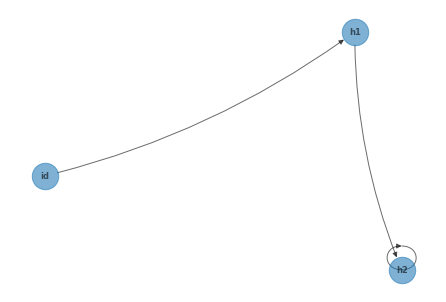

In [4]:
newG =nx.DiGraph(neighborgraph)

# for k,v in neighborgraph.items():
#     if len(v)==0:
#         neighborgraph = nested_delete(neighborgraph,k)
        
newG =nx.DiGraph(neighborgraph)

# deadnodes = [node for node,degree in dict(newG.out_degree()).items() if degree == 0]
# newG.remove_nodes_from(deadnodes)

options = {
#     'width':1.0,
#     'node_color':'white',
    'alpha':0.572,
#     'edge_color':'white',
    'node_size':700,
    "connectionstyle":'arc3, rad = 0.1',
    'with_labels':True,
    'font_size':'small',
    'font_color':'black',
    'font_weight':'bold'
}

pos = nx.spectral_layout(newG)
nx.draw(newG,pos,**options)